# **Machine Learning Assignment**

# Introduction

**Team:** Ivana Josipovic, Adrian Miramontes, Ariadna Davila  
**Date:** 15 October 2025

This notebook presents the Computational Carpentry project for Group Q. The project is organized into two blocks. For each block:
1. The original prompt from Moodle is shown in italics and bigger letters.
2. Corresponding answers with explenations on the solution pathway.

## 1. Cost Function (30 points)
##### *Let’s focus on linear regression of the form*


##### $𝑦 ≈ 𝑓(𝑥) = 𝑋𝑤_{1} + 𝑤_0$


##### *• What are the rows of X? (2.5 points)*


Each row of X corresponds to one training example and contains all its feature values.

For instance:
$$
X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1d} \\
x_{21} & x_{22} & \dots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}
$$

Each row $x_{i}$ represents the features of one sample.


##### *• What are the columns of X? (2.5 points)*


Each column of $X$ represents a feature across all training examples.

Thus, the $j^{th}$ column contains the values of feature $j$ for all samples.

##### *If we rewrite the equation as below:*

##### *$ y≈ 𝑋̃ 𝑊 $*

##### *• How does $𝑋̃$ look like in this case (i.e., how does the shape of the matrix change compare to ̃X)? (5 points)*

To include the bias term $w_0$, we add a column of ones to $X$:


$$
𝑋̃ = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1d} \\
1 & x_{21} & x_{22} & \dots & x_{2d} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}
$$


So, if $X$ has shape $(n, d)$, then $𝑋̃$ has shape $(n, d + 1)$.

##### *For machine learning, we need a cost function. There are the functions we try to minimize (or sometimes maximize). Two common choices are the mean-squared error (MSE), and the mean-absolute error (MAE).*


$ MSE = \frac{1}{N} \sum_{i=1}^N (y_i - f(x_i))^2 $  

$ MAE = \frac{1}{N} \sum_{i=1}^N |y_i - f(x_i)| $ 

##### *• In the Jupyter notebook, write a Python function that computes these two cost functions given an error term 𝜀 = 𝑦 − $𝑋̃$𝑤 (5 points, 2.5 each).*

In [ ]:
import numpy as np

def mse(error):
    return np.mean(error ** 2)


def mae(error):
    return np.mean(np.abs(error))


#example:
y = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
error = y - y_pred

print("MSE =", mse(error))
print("MAE =", mae(error))

[ 0.5 -0.5  0.  -1. ]
MSE = 0.375
MAE = 0.5


##### *• What is the shape of these cost functions as a function of the error (i.e., either sketch the shape of the functions as a function of the error or use matplotlib to plot the cost function as a function of the error—you can focus on the one-dimensional case, 5 points).*

If we define the error $e = y_i - f(x_i)$:

  MSE grows quadratically with $e$, which gives a smooth parabola.  
  MAE grows linearly with $e$, which results in a symmetric V-shape.
  

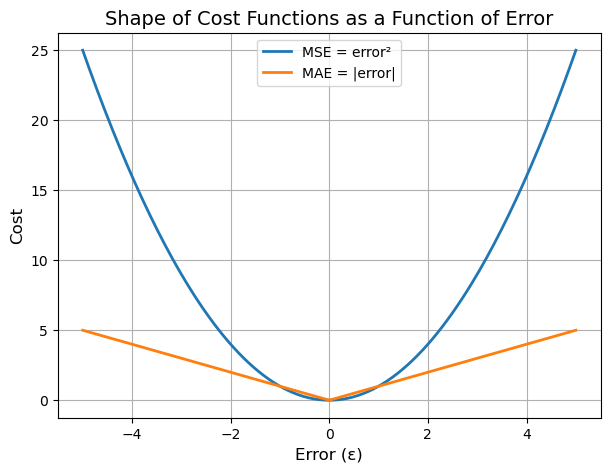

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of error values (1D case)
error = np.linspace(-5, 5, 200)

# Compute the two cost functions
mse = error ** 2
mae = np.abs(error)

# Plot the functions
plt.figure(figsize=(7, 5))
plt.plot(error, mse, label='MSE = error²', linewidth=2)
plt.plot(error, mae, label='MAE = |error|', linewidth=2)

# Add labels and legend
plt.title("Shape of Cost Functions as a Function of Error", fontsize=14)
plt.xlabel("Error (ε)", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

##### *• Are both loss functions differentiable for all 𝜀? (2.5 points) What implications does this have for gradient-based optimization like gradient descent? (2.5 points)*

  MSE is differentiable everywhere.
  
  However, MAE is not differentiable at $e = 0$. 

This implies two things:
- MSE allows smooth gradient updates.  
- MAE requires handling the non-differentiable point (for example using subgradients).

##### *• Which loss function is more sensitive to outliers (2.5 points) and why (2.5 points)?*

  MSE is more sensitive to outliers because large errors are squared, which increases their impact.  
  MAE treats all errors linearly, so it is less sensitive to outliers.

## 2. Regularization (70 points)

##### *In more complicated models, like polynomial regression, we approximate the function as a linear combination of such terms*
$$
f(x) = \sum_{i}^{n} a_i x^i
$$
##### *Let’s consider approximating the function 𝑐𝑜𝑠(1.5𝜋𝑥), using noisy samples of it (see code in the notebook)*

##### *• Plot the approximation to the function for different order polynomials (N ∈ {1, 2, 16}) and with different regularization strength (λ ∈ {0, $10^{-3}$, $10^{-2}$, 1}). What do you observe (explains in terms of the smoothness of the function, you can look up the term Occam’s razor). (10 points: plotting, description, explanation)*

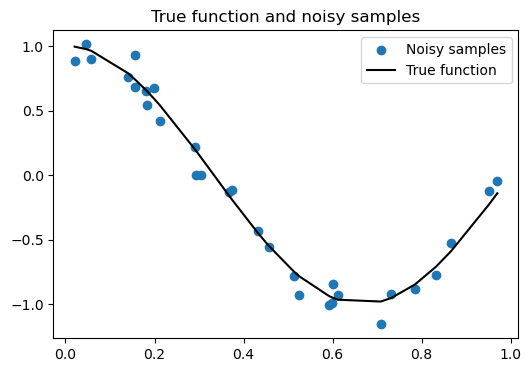

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

#generate noisy data
np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y_true = np.cos(1.5 * np.pi * X)
y_noisy = y_true + 0.1 * np.random.randn(n_samples)

#plot true function and noisy data
plt.figure(figsize=(6, 4))
plt.scatter(X, y_noisy, label="Noisy samples", color="tab:blue")
plt.plot(X, y_true, label="True function", color="black")
plt.legend()
plt.title("True function and noisy samples")
plt.show()


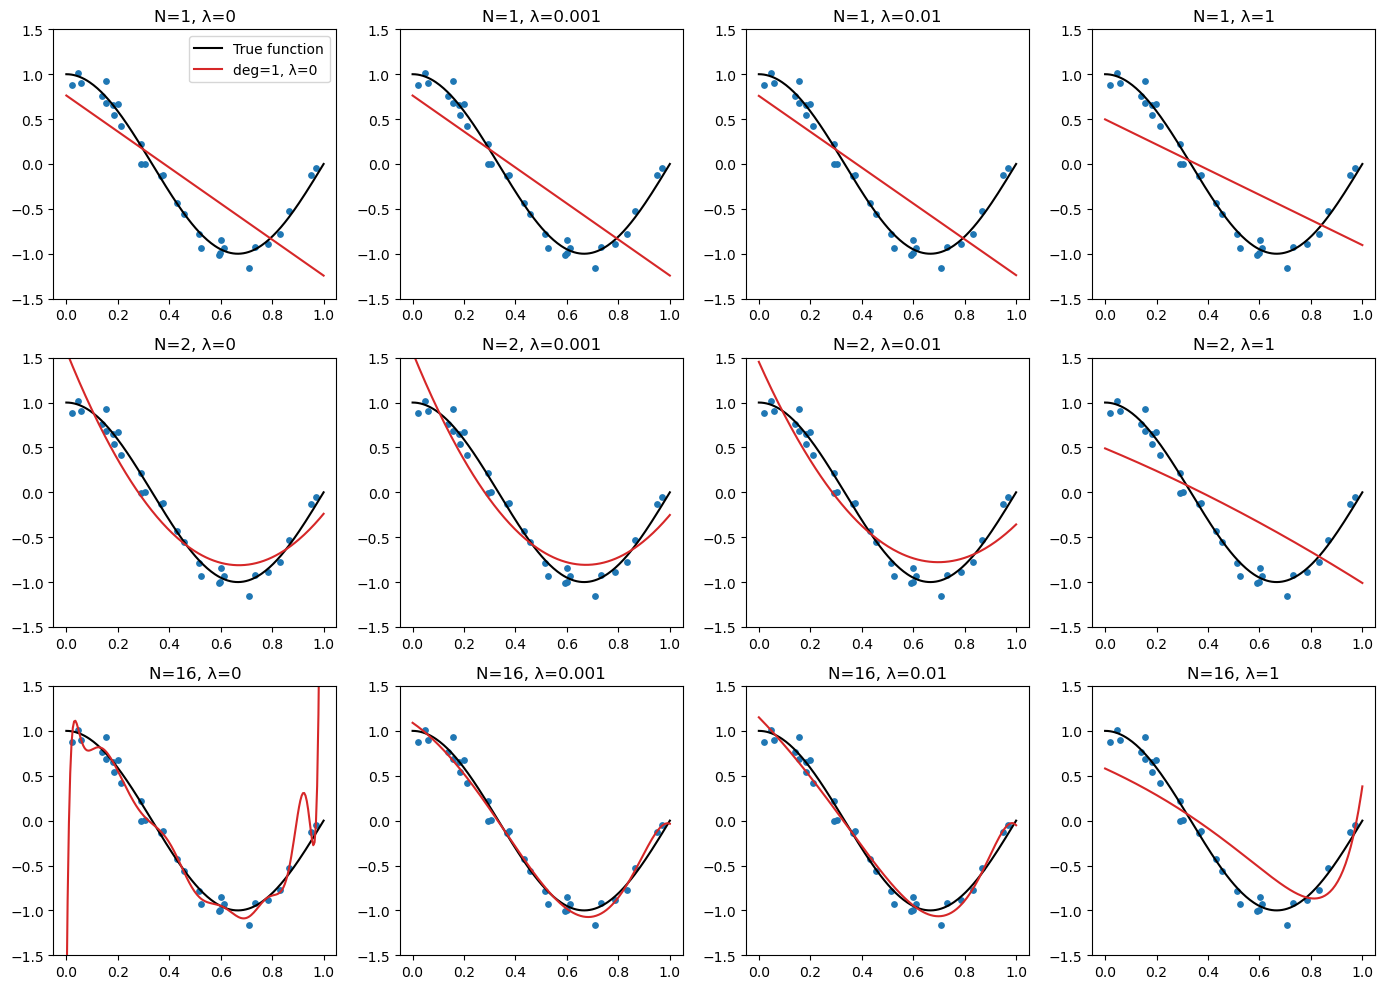

In [2]:
degrees = [1, 2, 16]
lambdas = [0, 1e-3, 1e-2, 1]

x_plot = np.linspace(0, 1, 200)

plt.figure(figsize=(14, 10))
plot_idx = 1

for N in degrees:
    for lam in lambdas:
        model = make_pipeline(PolynomialFeatures(N), Ridge(alpha=lam))
        model.fit(X[:, np.newaxis], y_noisy)
        y_pred = model.predict(x_plot[:, np.newaxis])

        plt.subplot(len(degrees), len(lambdas), plot_idx)
        plt.scatter(X, y_noisy, color="tab:blue", s=15)
        plt.plot(x_plot, np.cos(1.5 * np.pi * x_plot), color="black", label="True function")
        plt.plot(x_plot, y_pred, color="tab:red", label=f"deg={N}, λ={lam}")
        plt.ylim(-1.5, 1.5)
        if plot_idx == 1:
            plt.legend()
        plt.title(f"N={N}, λ={lam}")
        plot_idx += 1

plt.tight_layout()
plt.show()


We can observe that low-degree polynomials, such as $N = 1$ or $N = 2$, underfit the function. They cannot follow the oscillations and are therefore too smooth. 
On the other hand, high-degree oscillations, such as $N = 16$ with $λ = 0$, overfit the function. They oscillate too much in order to fit the noise. This can be prevented by increasing the rehuularization, which smooths the curve.
What describes the choice of the best parameters is Occam’s Razor. This tells us that a model should be as simple as possible, but not simpler than necessary. Few parameters should be chosen, in this case: lower-degree polynomials, since higher ones would also fit the noise.

##### *• What do you observe if you change the number of samples from the function? (5 points)*

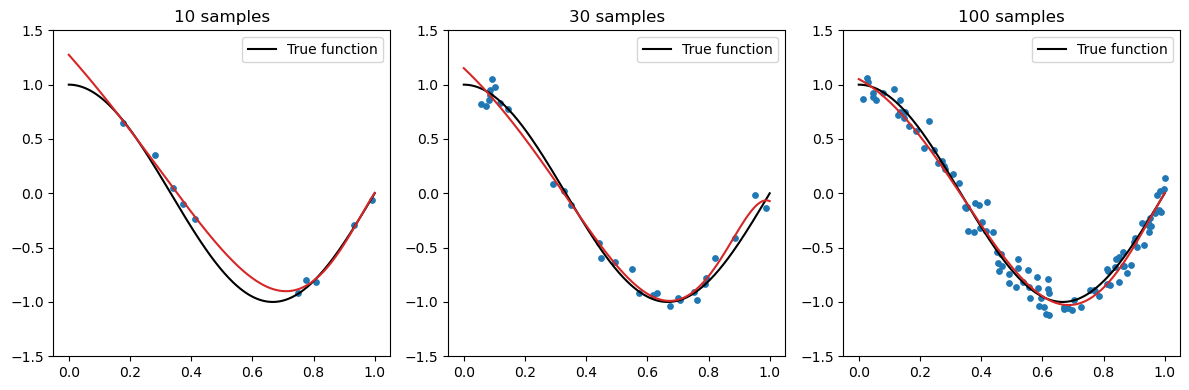

In [4]:
sample_sizes = [10, 30, 100]
degree = 10
lam = 1e-3

plt.figure(figsize=(12, 4))

for i, n in enumerate(sample_sizes, 1):
    Xn = np.sort(np.random.rand(n))
    yn = np.cos(1.5 * np.pi * Xn) + 0.1 * np.random.randn(n)
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=lam))
    model.fit(Xn[:, np.newaxis], yn)
    y_pred = model.predict(x_plot[:, np.newaxis])

    plt.subplot(1, 3, i)
    plt.scatter(Xn, yn, color="tab:blue", s=15)
    plt.plot(x_plot, np.cos(1.5 * np.pi * x_plot), color="black", label="True function")
    plt.plot(x_plot, y_pred, color="tab:red")
    plt.title(f"{n} samples")
    plt.ylim(-1.5, 1.5)
    plt.legend()

plt.tight_layout()
plt.show()


An observation that can be made is that the model becomes more stable when there are more samples. It generalizes it better. Whereas it overfits more easiy when there are few samples. This usually happens with high-degree polynomials.

##### *• Why do we need a test set in machine learning? (3 points)*

The reason we need a test set in ML is because it is necessary to evaluate how well the trained model generalizes to new or unseen data.
With this, we can detect overfitting that could potentially happen if we were too confident about our trained model.



##### *• If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (2 points)*

No, the test set is only used to check the final performance of the model, but not to select the best hyperparameters. The latter can be done using a (cross-)validation set.